In [1]:
import pickle
import os
import pandas as pd
import joblib

In [2]:
os.chdir("c:\\Users\\vnarv\\purchase-predict")

In [3]:
loaded_model = pickle.load(open("data/06_models/model.pkl", 'rb'))
transform_pipe = joblib.load("data/04_feature/transform_features.pkl")

In [43]:
cols = ["product_id", "brand", "price", "user_id", "user_session", "purchased",	"num_views_session",
        "num_views_product", "category", "sub_category",	"hour",	"minute",	"weekday",	"duration",
        "num_prev_sessions", "num_prev_product_views"]
# data =  [[1004856, 543, 132.87, 5, 1, 7, 29, 16, 36, 1, 193, 0, 0]]

data = [[1004856, "samsung", 130.76, 543272936,	"8187d148-3c41-46d4-b0c0-9c08cd9dc564", 1, 3, 3, "electronics", "smartphone",	0,	2,	1,	80,	0,	0]]


In [44]:
test_data = pd.DataFrame(data=data, columns=cols)
test_data

,product_id,brand,price,user_id,user_session,purchased,num_views_session,num_views_product,category,sub_category,hour,minute,weekday,duration,num_prev_sessions,num_prev_product_views
0,1004856,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,1,3,3,electronics,smartphone,0,2,1,80,0,0


In [58]:
def predict_x(model, X, transform_pipeline):
    X = X.drop(["user_id", "user_session", "purchased"], axis=1).copy()
    if model:# FIXME Error: "Model has no attribute model"
        if transform_pipeline:
            for name, encoder in transform_pipeline:
                X[name] = X[name].fillna("unknown")
                X[name] = encoder.transform(X[name])
    return model.predict(X)


In [47]:
test_data.drop(["user_id", "user_session", "purchased"], axis=1)

,product_id,brand,price,num_views_session,num_views_product,category,sub_category,hour,minute,weekday,duration,num_prev_sessions,num_prev_product_views
0,1004856,samsung,0.0,3,3,electronics,smartphone,0,2,1,80,0,0


In [41]:
loaded_model["model"].feature_importances_

array([335, 210, 292, 150, 119,  51,  71, 153, 196,   0, 345,  41,  17])

In [53]:
test_data

,product_id,brand,price,user_id,user_session,purchased,num_views_session,num_views_product,category,sub_category,hour,minute,weekday,duration,num_prev_sessions,num_prev_product_views
0,1004856,samsung,0.0,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,1,3,3,electronics,smartphone,0,2,1,0,0,0


In [ ]:
df = pd.DataFrame()
for i in range(100):
    test_data.loc[test_data["duration"]>=0, "duration"] = i
    result = predict_x(loaded_model["model"], test_data, transform_pipe)
    tmp = pd.DataFrame(data=[[i, result[0]]], columns=["value", "prediction"])
    df = pd.concat([df, tmp], axis=0)

In [65]:
test_data

,product_id,brand,price,user_id,user_session,purchased,num_views_session,num_views_product,category,sub_category,hour,minute,weekday,duration,num_prev_sessions,num_prev_product_views
0,1004856,samsung,0.0,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,1,3,3,electronics,smartphone,0,2,1,99,0,0


<Axes: xlabel='value', ylabel='prediction'>

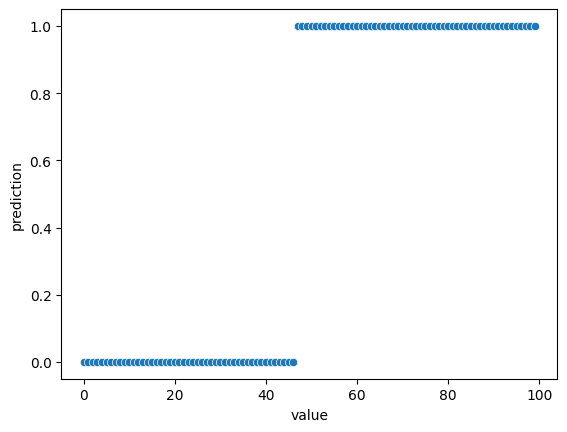

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x="value", y="prediction")